In [62]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import re
from os import path
from wordcloud import WordCloud

In [5]:
path = r'/Users/WernerChao/Dropbox/Werner/Data_Science_Projects/kickstarter/data' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
data = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
### Clean the JSON format for certain columns below:
import json

def parse_json(cell, key):
    try:
        return str(json.loads(cell)[key])
    except UnicodeEncodeError as e:
        print e
        print cell
        return json.loads(cell)[key]
    except TypeError as e:
        print e
        print cell
        return 'na'

In [7]:
### Create a new column 'cat' that is a json-cleaned version of column 'category'

category = map(parse_json, data.iloc[:]['category'], ['name']*len(data))
cat_slug = map(parse_json, data.iloc[:]['category'], ['slug']*len(data))

for i, item in enumerate(set(cat_slug)):
    print i+1, ':', item

data['cat'] = cat_slug
print len(data['cat'].unique())
data['cat'].unique()

1 : theater/immersive
2 : games/video games
3 : theater/experimental
4 : music/classical music
5 : film & video/shorts
6 : technology/flight
7 : technology/diy electronics
8 : music/electronic music
9 : theater/plays
10 : technology/web
11 : music/country & folk
12 : technology/hardware
13 : technology/gadgets
14 : theater/spaces
15 : film & video/narrative film
16 : food/restaurants
17 : film & video/webseries
18 : theater/festivals
19 : technology/apps
20 : publishing/academic
21 : music/blues
22 : theater/musical
23 : photography/places
24 : film & video/thrillers
24


array(['publishing/academic', 'photography/places',
       'music/electronic music', 'music/country & folk',
       'music/classical music', 'music/blues', 'games/video games',
       'food/restaurants', 'film & video/webseries',
       'film & video/thrillers', 'film & video/shorts',
       'film & video/narrative film', 'technology/web', 'technology/apps',
       'technology/gadgets', 'technology/hardware', 'theater/festivals',
       'theater/plays', 'theater/musical', 'technology/flight',
       'technology/diy electronics', 'theater/spaces', 'theater/immersive',
       'theater/experimental'], dtype=object)

In [10]:
data.head(3)

id                                              photo  \
0  1454391034  {"small":"https://ksr-ugc.imgix.net/assets/011...   
1  1655206086  {"small":"https://ksr-ugc.imgix.net/assets/012...   
2   311581827  {"small":"https://ksr-ugc.imgix.net/assets/012...   

                                                name  \
0  Auntie Di's Music Time Sign ASL for Hearing an...   
1                    Jump Start Kindergarten Toolkit   
2  Ojukwu Balewa Awolowo (O.B.A.) Public Library ...   

                                               blurb    goal  pledged   state  \
0  MTS ASL Curriculum Workbook is a reproducible ...    1500      0.0  failed   
1  This kit teaches how to print, correct an ugly...     500      0.0  failed   
2  Establishing a free, world-class, public libra...  100000    120.0  failed   

                                                slug disable_communication  \
0  auntie-dis-music-time-sign-asl-for-hearing-and...                 False   
1                    jump-start-kindergarten-toolkit                 False   
2  ojukwu-balewa-awolowo-oba-public-library-of-ni...                 False   

  country         ...           \
0      US         ...            
1      US         ...            
2      US         ...            

                                            category  \
0  {"urls":{"web":{"discover":"http://www.kicksta...   
1  {"urls":{"web":{"discover":"http://www.kicksta...   
2  {"urls":{"web":{"discover":"http://www.kicksta...   

                                             profile spotlight  \
0  {"background_image_opacity":0.8,"should_show_f...     False   
1  {"background_image_opacity":0.8,"should_show_f...     False   
2  {"background_image_opacity":0.8,"should_show_f...     False   

                                                urls  \
0  {"web":{"project":"https://www.kickstarter.com...   
1  {"web":{"project":"https://www.kickstarter.com...   
2  {"web":{"project":"https://www.kickstarter.com...   

                                          source_url  friends  is_starred  \
0  https://www.kickstarter.com/discover/categorie...      NaN         NaN   
1  https://www.kickstarter.com/discover/categorie...      NaN         NaN   
2  https://www.kickstarter.com/discover/categorie...      NaN         NaN   

  is_backing  permissions                  cat  
0        NaN          NaN  publishing/academic  
1        NaN          NaN  publishing/academic  
2        NaN          NaN  publishing/academic  

[3 rows x 33 columns]

In [61]:
def cat_blurb(category):
    text = data[data['cat'] == category]['blurb'].values

    category_re = re.sub('./', '_', category)
    np.savetxt(
        r'/Users/WernerChao/Dropbox/Werner/Data_Science_Projects/kickstarter/blurb/{}_blurb.txt'.format(category_re), \
        text, fmt='%s')


_ = map(cat_blurb, data['cat'].unique())

In [73]:
def make_wordcloud(category):
    # Read the whole text.
    category_re = re.sub('./', '_', category)
    text = open('/Users/WernerChao/Dropbox/Werner/Data_Science_Projects/kickstarter/blurb/{}_blurb.txt'.format(category_re)).read()

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('{}: Word Cloud_1'.format(category_re))

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('{}: Word Cloud_2'.format(category_re))
    plt.show()

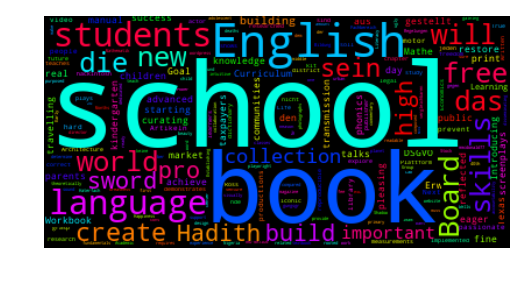

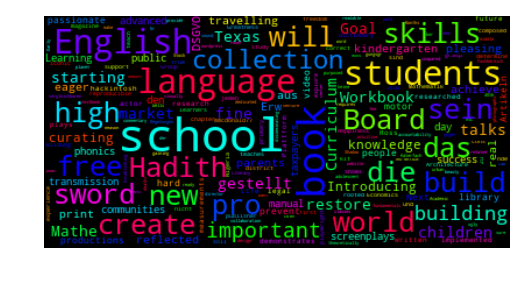

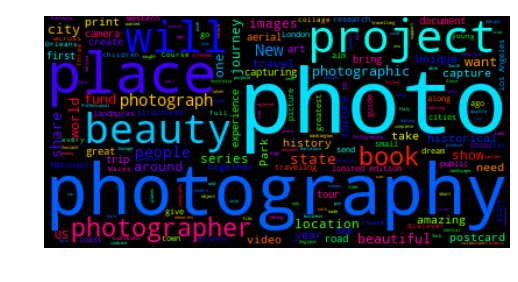

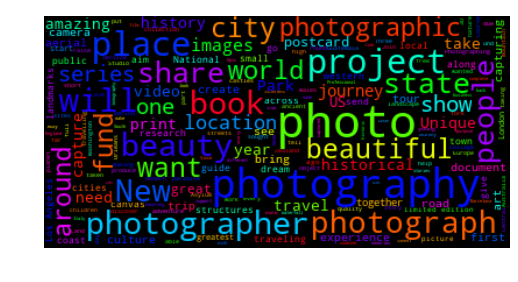

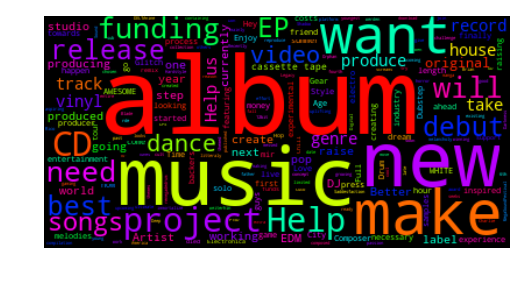

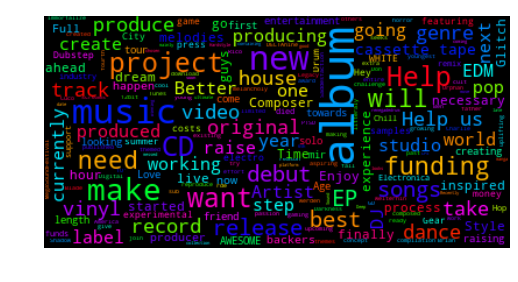

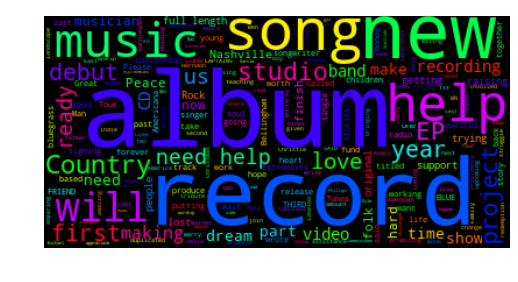

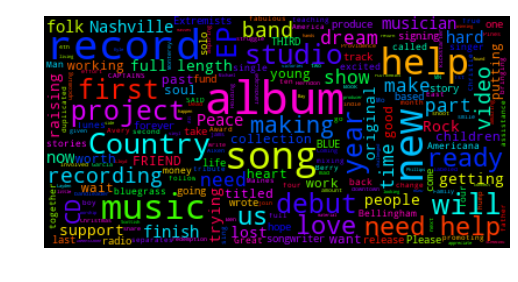

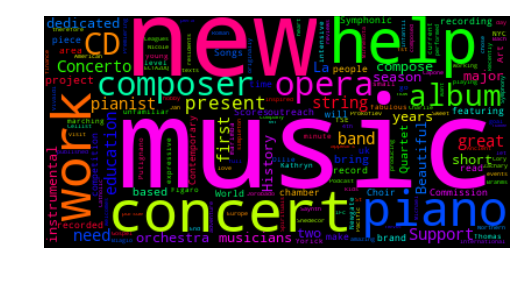

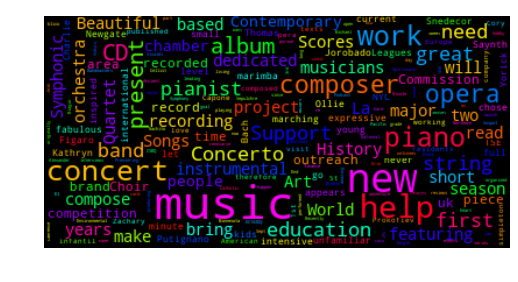

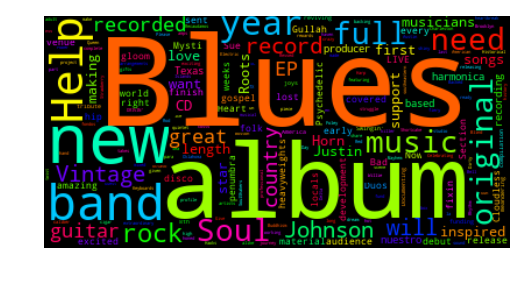

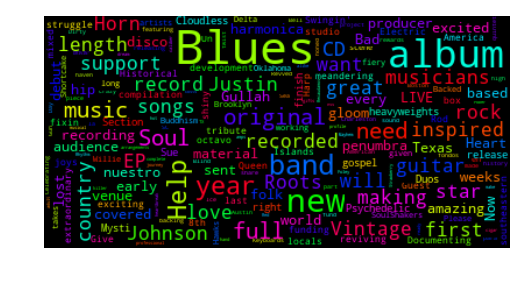

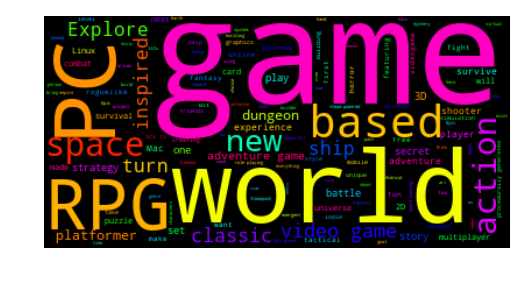

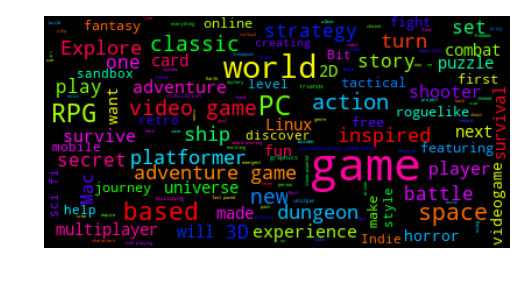

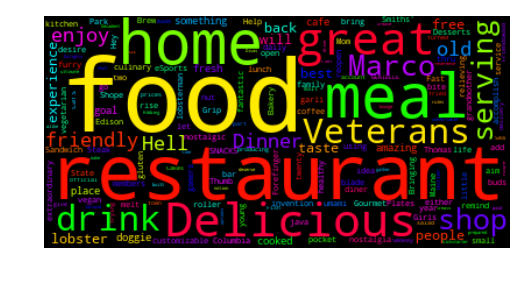

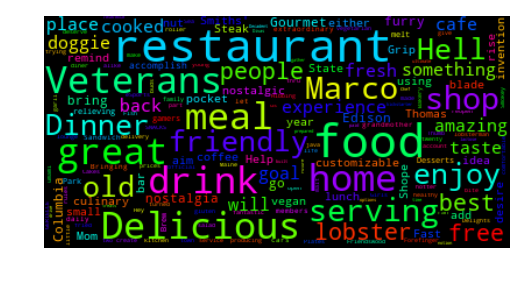

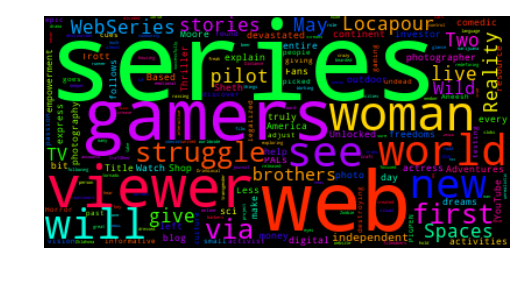

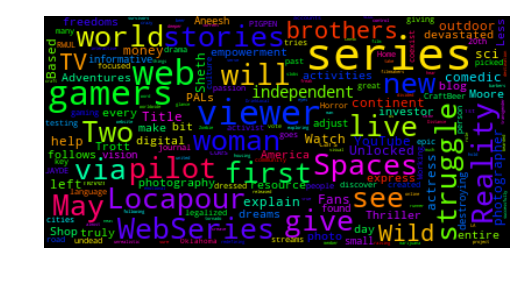

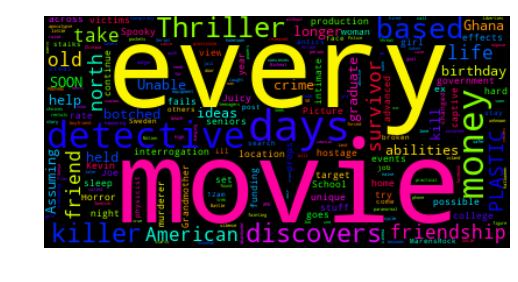

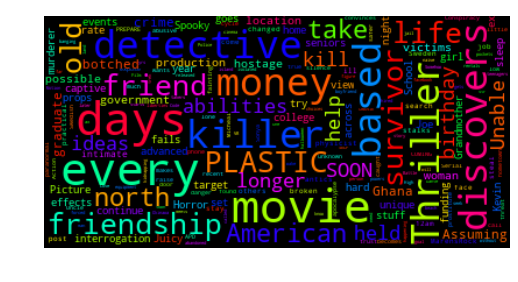

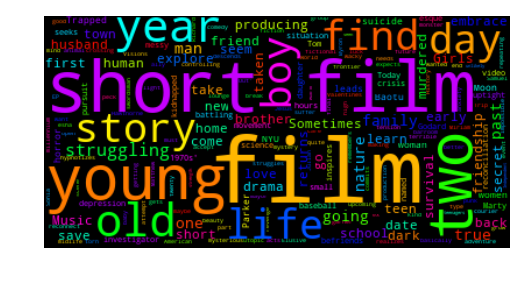

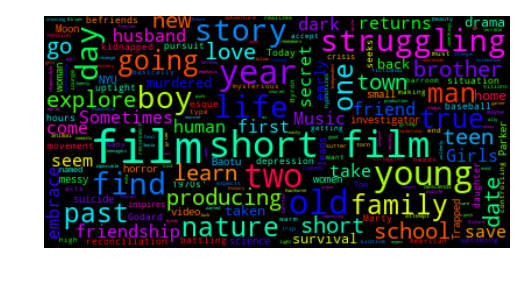

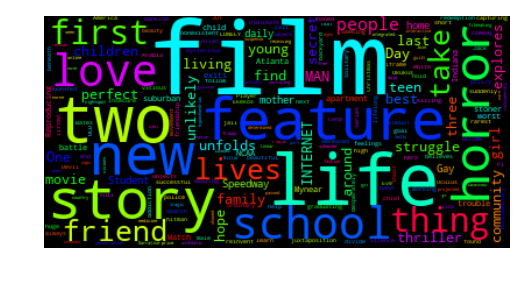

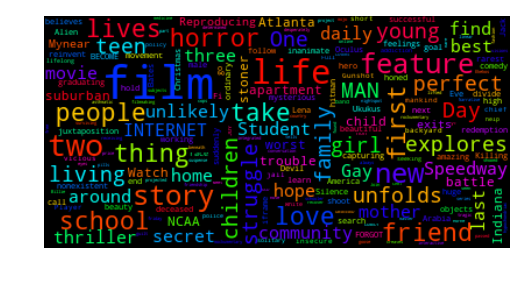

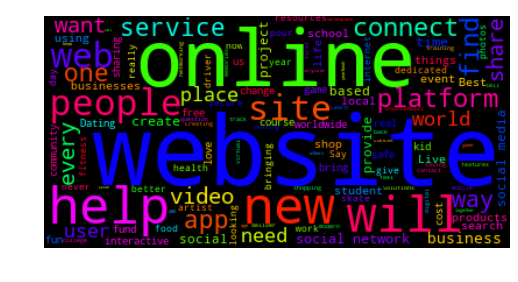

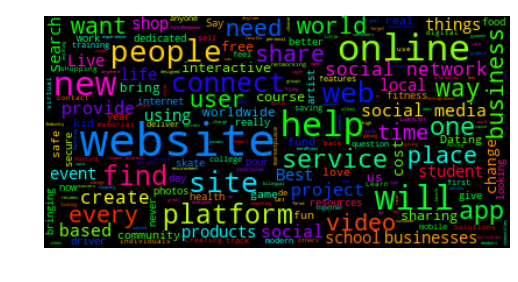

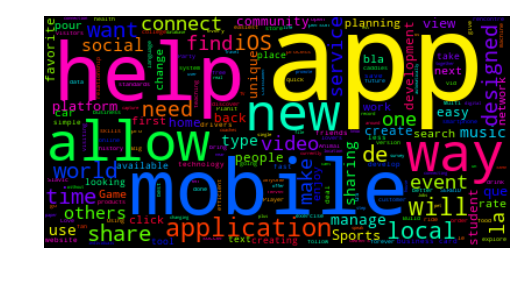

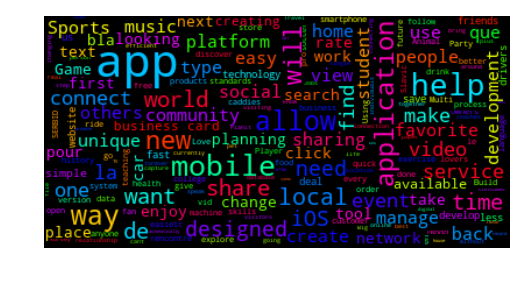

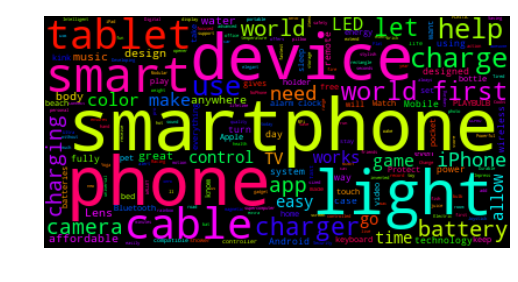

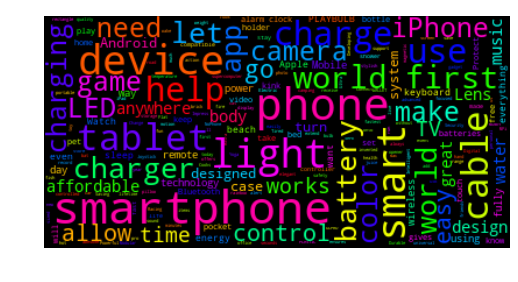

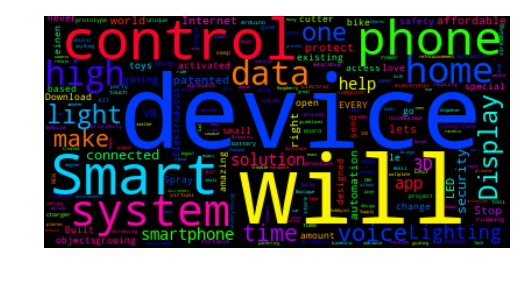

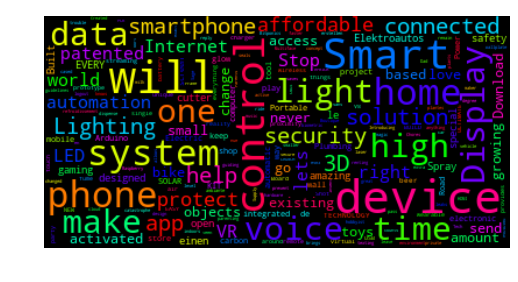

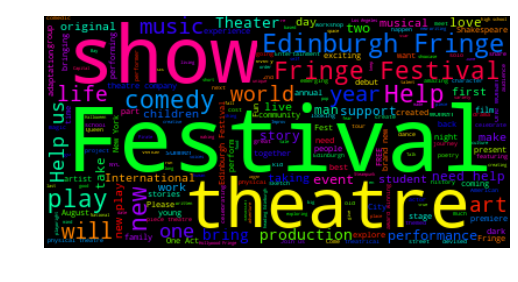

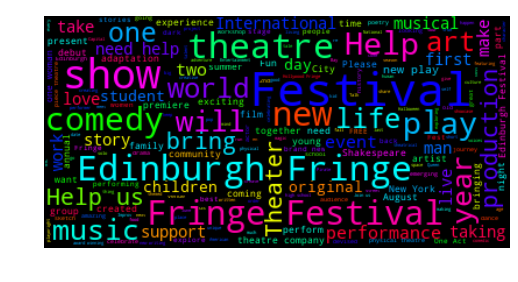

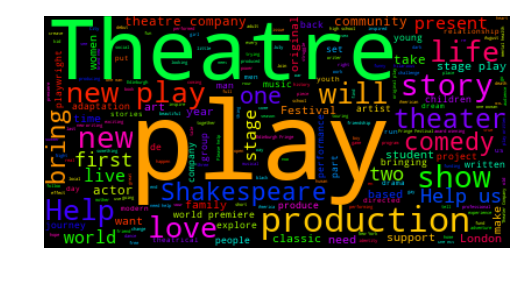

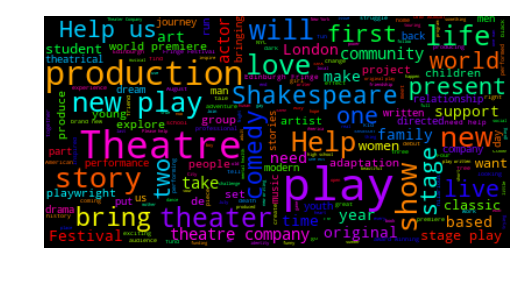

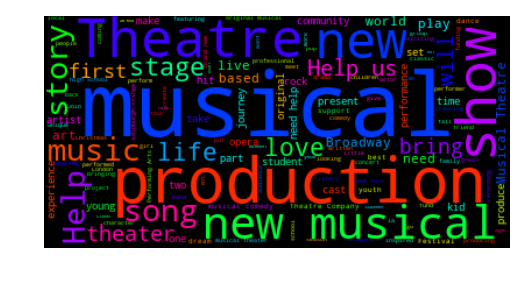

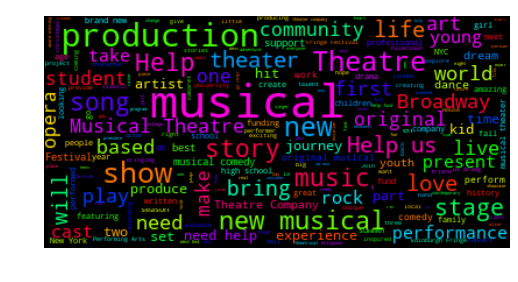

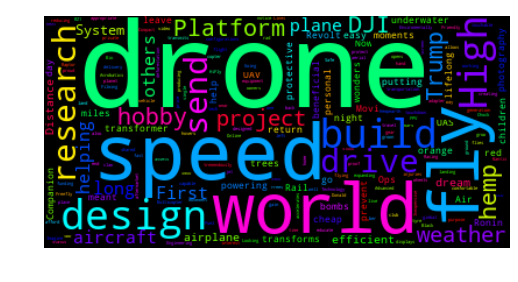

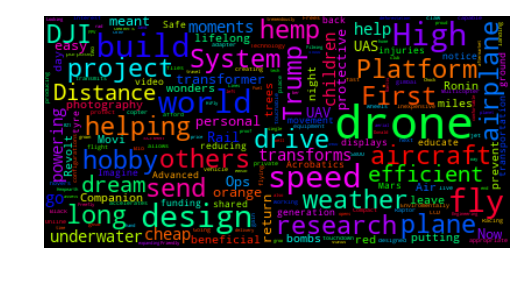

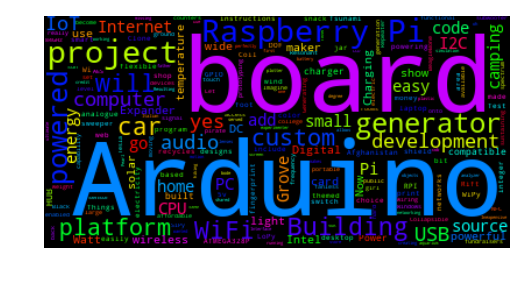

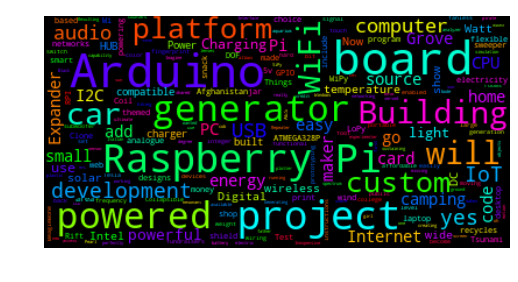

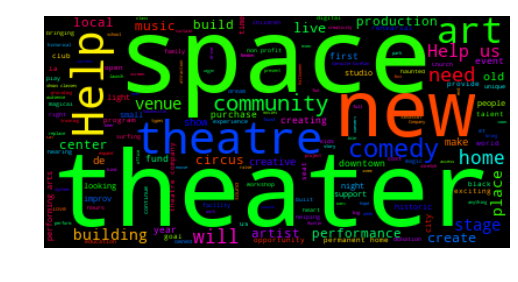

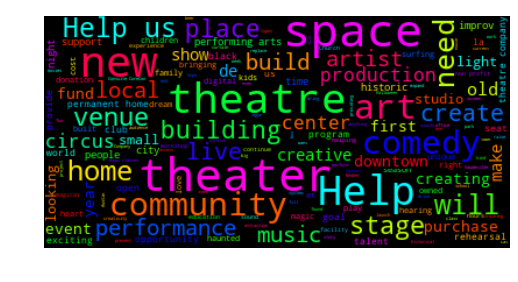

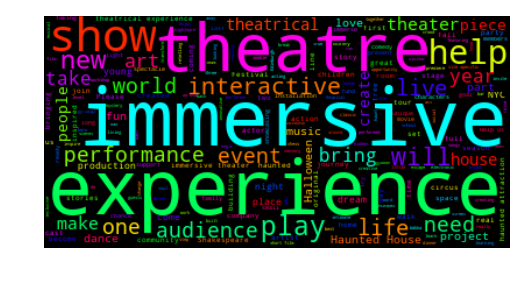

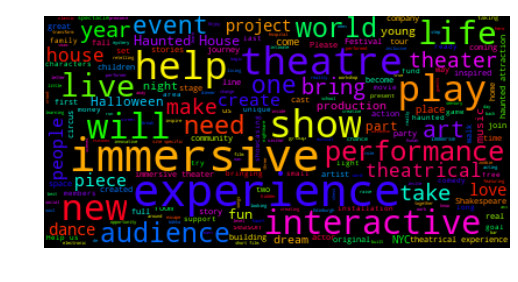

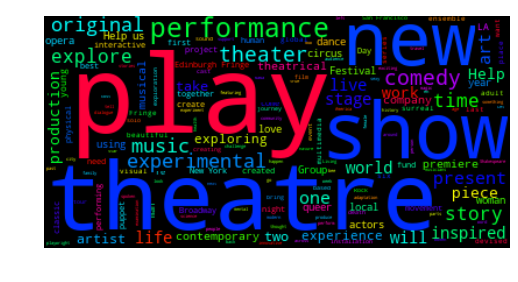

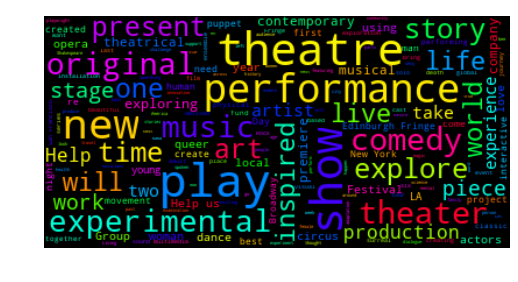

In [74]:
_ = map(make_wordcloud, data['cat'].unique())

In [75]:
data['cat'].unique()

array(['publishing/academic', 'photography/places',
       'music/electronic music', 'music/country & folk',
       'music/classical music', 'music/blues', 'games/video games',
       'food/restaurants', 'film & video/webseries',
       'film & video/thrillers', 'film & video/shorts',
       'film & video/narrative film', 'technology/web', 'technology/apps',
       'technology/gadgets', 'technology/hardware', 'theater/festivals',
       'theater/plays', 'theater/musical', 'technology/flight',
       'technology/diy electronics', 'theater/spaces', 'theater/immersive',
       'theater/experimental'], dtype=object)